# Task:
Simulate C5 probe in water

## Preparing the Molecule Topology

### Structure Files

Build molecule pdb file in avogadro or take pdb file from another source. If you build in Avogadro:
- Ensure correct bond orders
- use Avogadro tools to optimize the geometry of the molecule

Save as a mol2 file

Change the molecule heading of the mol2 (see below)

becomes...

Ensure correct ordering of the bonds section by running [this perl script](sort_mol2_bonds.pl) (source: [Justin Lemkul Tutorial](http://www.mdtutorials.com/gmx/complex/index.html))

In [ ]:
perl sort_mol2_bonds.pl C5Y.mol2 C5Y_fix.mol2

In [ ]:
rm C5Y.mol2; mv C5Y_fix.mol2 C5Y.mol2

### CGenFF

- upload C5Y_fix.mol2 to [CGenFF](https://cgenff.umaryland.edu/initguess/)
- save resulting charmm file as scn.str
- convert charmm files to gromacs files using [this python script](cgenff_charmm2gmx.py) ([Justin Lemkul Tutorial](http://www.mdtutorials.com/gmx/complex/index.html))

In [2]:
!python2.7 cgenff_charmm2gmx.py C5Y C5Y.mol2 C5Y.str charmm36-jul2017.ff

NOTE1: Code tested with python 2.7.3. Your version: 2.7.12 (default, Apr 15 2020, 17:07:12) 
[GCC 5.4.0 20160609]

NOTE2: Please be sure to use the same version of CGenFF in your simulations that was used during parameter generation:
('--Version of CGenFF detected in ', 'C5Y.str', ':', '4.0')
--Version of CGenFF detected in  charmm36-jul2017.ff/forcefield.doc : 4.0

NOTE3: In order to avoid duplicated parameters, do NOT select the 'Include parameters that are already in CGenFF' option when uploading a molecule into CGenFF.
============ DONE ============
Conversion complete.
The molecule topology has been written to c5y.itp
Additional parameters needed by the molecule are written to c5y.prm, which needs to be included in the system .top
============ DONE ============


> _**NOTE:**_ This python program is finicky. Check that your charmm forcefield file has the same version of CGenFF that you used to create the str file. If they are not the same, this script will throw an error. I had to use an older forcefield file to get the script to run and then go back to a newer verion of charmm for the remainder of the steps. 

## pdb2gmx steps

Since we do not have a protein in our pdb, pdb2gmx will not function correctly. I believe there is a way to change this, but I do not understand gromacs well enough to go that route. Instead, we will generate the three pdb2gmx output files (topology, structure, and position restraint) separately

### Structure File (.gro)

the python script used above produces a .pdb file that matches the atom names in all other files that came out of the CGenFF step. Use that file to create a .gro file

In [4]:
! gmx editconf -f c5y_ini.pdb -o 200424.gro

                 :-) GROMACS - gmx editconf, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

### Position Restraint File (.itp)

create a group that includes all atoms of the molecule without the H's

In [5]:
!(echo "0 & ! a H*"; echo q)| gmx make_ndx -f 200424.gro -o index_C5Y.ndx

                 :-) GROMACS - gmx make_ndx, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

execute the genrestr module to create the position restraint file

In [6]:
!echo 3| gmx genrestr -f 200424.gro -n index_C5Y.ndx -o posre_C5Y.itp -fc 1000 1000 1000

                 :-) GROMACS - gmx genrestr, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

### Topology file (topol.top)

To generate a topology file template, I ran pdb2gmx on a standard protein (in this case, [apo GmACP](gmACPapo_fix.pdb)) and then deleted the information about the protein
- be sure to use an updated version of the charmm ff (in this case, an edited version of march 2019, charmm36-190509.ff)

In [ ]:
echo 1| gmx pdb2gmx -f gmACPapo_fix.pdb  -o protein.gro -water tip3p

- include the molecule parameters
- include the molecule topology
- include the molecule position restraint file
- update the [ molecules ] directive to include the molecule
- See resulting topol.top...

## Building/Running the simulation

### Build the box, solvate, add ions(?), and minimize the structure

In [7]:
! gmx editconf -f 200424.gro -o 200424_newbox.gro -c -d 1.0 -bt dodecahedron

                 :-) GROMACS - gmx editconf, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [8]:
! gmx solvate -cp 200424_newbox.gro -cs spc216.gro -o 200424_solv.gro -p topol.top

                  :-) GROMACS - gmx solvate, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

for this molecule, I did not have to add ions, as the molecule is neutral. If you have a non-neutral molecule, follow the steps in the [Justin Lemkul Tutorial](http://www.mdtutorials.com/gmx/complex/index.html) to add ions

In [9]:
!gmx grompp -f minim.mdp -c 200424_solv.gro -p topol.top -o minim.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [10]:
!gmx mdrun -v -deffnm minim

                   :-) GROMACS - gmx mdrun, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

### Equilibration

the temperature coupling groups must be changed in the .mdp files. If you are following this to run with a different system, read more about this in the [Justin Lemkul Tutorial](http://www.mdtutorials.com/gmx/complex/index.html)

edit temperature coupling groups [nvt.mdp](nvt.mdp), [npt.mdp](npt.mdp), and [md.mdp](md.mdp)
- "tc-grps                 = C5Y Water   ; two coupling groups - more accurate"

In [12]:
!gmx grompp -f nvt.mdp -c minim.gro -r minim.gro -p topol.top -o nvt.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [13]:
!gmx mdrun -deffnm nvt

                   :-) GROMACS - gmx mdrun, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [16]:
!gmx grompp -f npt.mdp -c nvt.gro -t nvt.cpt -r nvt.gro -p topol.top -o npt.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [17]:
!gmx mdrun -deffnm npt

                   :-) GROMACS - gmx mdrun, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

## Production Run

In [18]:
!gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o 200424_md.tpr

                  :-) GROMACS - gmx grompp, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University

In [ ]:
!gmx mdrun -deffnm 200424_md

## Post-Processing

In [1]:
!(echo 2; echo 0)| gmx trjconv -s 200424_md.tpr -f 200424_md.xtc -o 200424_md_center.xtc -center -pbc mol -ur compact

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [2]:
!(echo 2; echo 0)|gmx trjconv -s 200424_md.tpr -f 200424_md.xtc -o 200424_md_center.gro -center -pbc mol -ur compact

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [3]:
!echo 0|gmx trjconv -s 200424_md.tpr -f 200424_md_center.xtc -o 200424_md_start.pdb -dump 0

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

# Analysis

## Import Packages

In [20]:
import MDAnalysis
import MDAnalysis.analysis.hbonds
import MDAnalysis.analysis.rms
import MDAnalysis.lib.NeighborSearch as NSearch
import numpy as np
import nglview as nv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ipywidgets
%matplotlib inline

In [5]:
#Pickle allows you to save python objects as files and then load them back into 
#objects. This way you can save analysis results and load them at a later date or in another notebook

import pickle
def save(dObj, sFilename):
  '''Given an object and a file name, write the object to the file using pickle.'''

  f = open(sFilename, "wb")
  p = pickle.Pickler(f)
  p.dump(dObj)
  f.close()

def load(sFilename):
  '''Given a file name, load and return the object stored in the file.'''

  f = open(sFilename, "rb")
  u = pickle.Unpickler(f)
  dObj = u.load()
  f.close()
  return dObj

## Build MDAnalysis Universe

In [6]:
u = MDAnalysis.Universe("200424_md_start.pdb", "200424_md_center.xtc")
ref = MDAnalysis.Universe("200424_md_start.pdb", "200424_md_center.xtc")

In [7]:
len(u.trajectory)

1001

In [8]:
list(u.atoms)

[<Atom 1: C1 of type C of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 2: O1 of type O of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 3: O2 of type O of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 4: C2 of type C of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 5: H1 of type H of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 6: C3 of type C of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 7: H2 of type H of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 8: H3 of type H of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 9: H4 of type H of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 10: C4 of type C of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 11: H5 of type H of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 12: C5 of type C of resname C5Y, resid 1 and segid SYSTEM and altLoc >,
 <Atom 13: H6 of type H of resname C5Y, resid 1 and segid SYS

## RMSD

In [9]:
R = MDAnalysis.analysis.rms.RMSD(u, ref, select="resid 1", filename ="rmsd.dat")
R.run()
rmsd = R.rmsd.T # transpose makes it easier for plotting

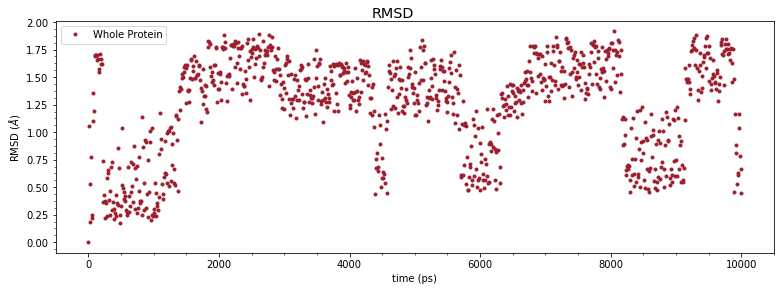

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('RMSD', y = 1, fontsize = 'x-large')
gridspec.GridSpec(6,4)

ax = plt.subplot2grid((6,4), (0,0), colspan=4, rowspan=6)
ax.plot(rmsd[1], rmsd[2],  '.', color='#9c1f2e', label ='Whole Protein')
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
plt.minorticks_on()
plt.legend(loc="best")

fig.set_size_inches(w=11,h=4)
fig.tight_layout()
plt.show()

## SASA

In [23]:
!(echo "a 4 | a 6-13"; echo "a 10 | a 12-13"; echo q)|gmx make_ndx -f 200424_md.tpr -o probe.ndx

                 :-) GROMACS - gmx make_ndx, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

In [ ]:
! gmx trjconv -s 200424_md.tpr -f 200424_md_center.xtc -o probeCheck.pdb - e 0 -b 0 -n probe.ndx

In [19]:
import py3Dmol; cut=1 
pdbdata=open('probeCheck.pdb', 'r').read()
view=py3Dmol.view(); view.addModel(pdbdata,'pdb'); view.zoomTo(); view.setBackgroundColor('black'); view.setStyle({'stick':{'color':'spectrum'}}); view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
!echo 6|  gmx sasa -s 200424_md.tpr -f 200424_md_center.xtc -o probe_SASA.xvg -n probe.ndx -surface "C5Y" -output

                   :-) GROMACS - gmx sasa, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala University,

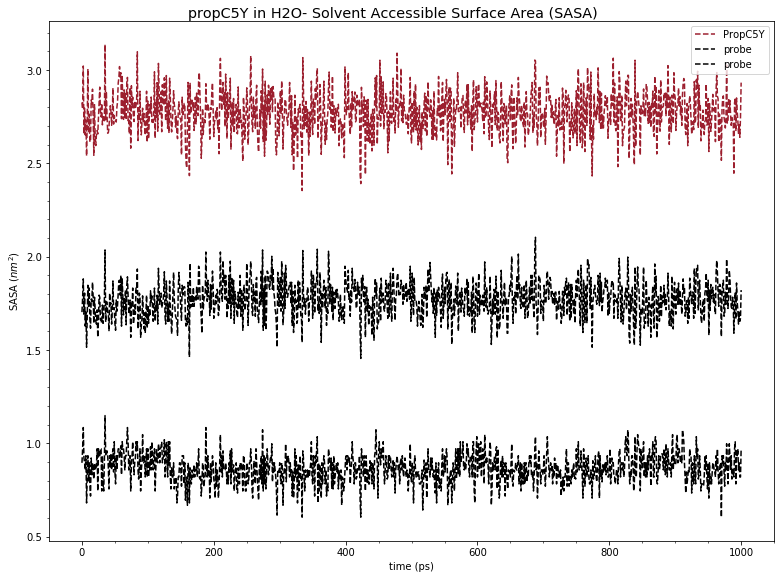

In [24]:
import gromacs.formats as wrap
SASA = wrap.XVG()
SASA.read(filename='probe_SASA.xvg')
sasa = SASA.array

import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
fig = plt.figure(1)
plt.suptitle('propC5Y in H2O- Solvent Accessible Surface Area (SASA)',y = 1, fontsize = 'x-large')
gridspec.GridSpec(4,4)

ax = plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=4)
plt.minorticks_on()
ax.plot(sasa[1], '--', color='#9c1f2e', label='PropC5Y')
ax.plot(sasa[2], '--', color='black', label='probe')
ax.plot(sasa[3], '--', color='black', label='probe')
#plt.axhline(y=7.73, color='#4b2e84', label='Observed Arm Max')
plt.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"SASA ($nm^{2}$)")
plt.minorticks_on()

fig.set_size_inches(w=11,h=8)
fig.tight_layout()
#plt.savefig("AcpP_SCN_SASA.png")
plt.show()

In [25]:
dDict = {}
dDict['time'] = sasa[0]
dDict['totalSASA'] = sasa[1]
dDict['C2-C5'] = sasa[2]
dDict['C4&C5'] = sasa[3]

In [26]:
save(dDict, "200424_pickleSASA_dictionary")